### Este archivo limpia la base de datos conforme a los objetivos marcados

In [1]:
%pip install ipython
%pip install seaborn

import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_seq_items', None)

import numpy as np

import re

import warnings
warnings.filterwarnings('ignore')

import pylab as plt
import seaborn as sns

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
shark = pd.read_csv(r"\Users\ccior\IRONHACK\Proyectos\01-w2-pandas-Carlos-Ciordia\src\attacks.csv", encoding="ISO-8859-1")

In [3]:
raw_shark = shark.copy() #he dejo una copia del df y trabajo con shark

In [4]:
shark.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


## Nombres de las columnas. Limpieza nombres

In [5]:
shark.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
shark.shape

(25723, 24)

In [7]:
shark.columns = shark.columns.str.rstrip() #con rstrip elimino los espacios en blanco a la derecha del nombre de columna.

## Valores nulos

In [8]:
nan_cols = shark.isna().sum()

nan_cols[nan_cols>0]

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [9]:
#valores nulos porcentualmente

nan_cols = shark.isna().mean() * 100

nan_cols[nan_cols>0]

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

In [10]:
#Función para comprobar la cantidad de elementos nulos dentro de mi df.

def check_nan(df: pd.DataFrame) -> None:
    
    """
    Recibe un dataframe y enseña el % de nulos y lo grafica
    """
    
    nan_cols = df.isna().mean() * 100  # % de valores nulos
    
    nan_cols = nan_cols[nan_cols>0]
    
    display(f'N nan cols: {len(nan_cols)}')
    display(nan_cols)
    
    
    # grafico de nulos en el dataframe

    #inicializa la figura
    plt.figure(figsize=(10, 6))  # 100X60  pixeles


    sns.heatmap(df.isna(),       # datos
                yticklabels=False,  # quita las etiquetas del eje y
                cmap='viridis',      # mapa de color
                cbar=False           # sin barra lateral
               )

    plt.show();

'N nan cols: 24'

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

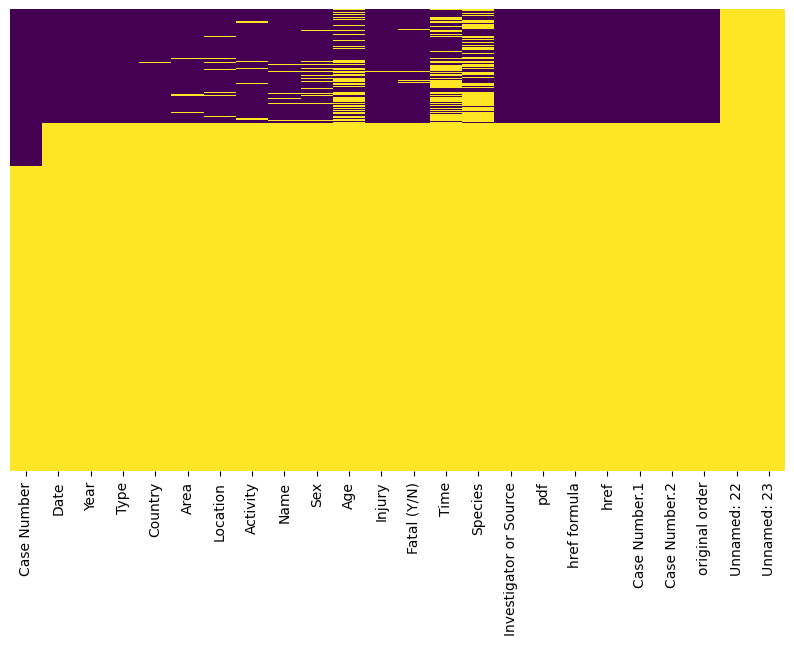

In [11]:
check_nan(shark)

In [12]:
shark = shark.drop_duplicates()

In [13]:
shark.shape #De 250000 registros pasa a 6000

(6312, 24)

'N nan cols: 24'

Case Number                0.031686
Date                       0.158428
Year                       0.190114
Type                       0.221800
Country                    0.950570
Area                       7.366920
Location                   8.713561
Activity                   8.776933
Name                       3.485425
Sex                        9.109632
Age                       45.009506
Injury                     0.602028
Fatal (Y/N)                8.697719
Time                      53.295311
Species                   45.120406
Investigator or Source     0.427757
pdf                        0.158428
href formula               0.174271
href                       0.158428
Case Number.1              0.158428
Case Number.2              0.158428
original order             0.047529
Unnamed: 22               99.984157
Unnamed: 23               99.968314
dtype: float64

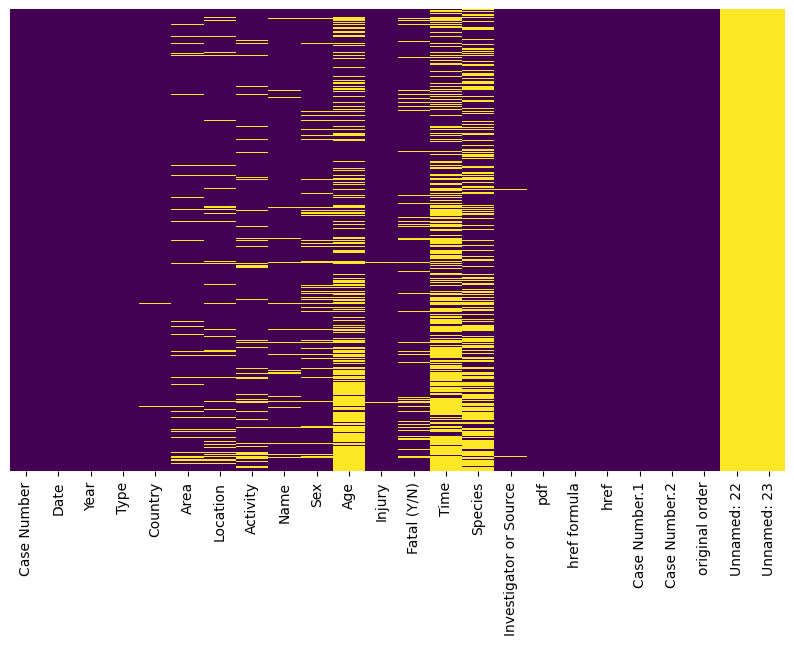

In [14]:
check_nan(shark)

### Para la limpieza de datos, marco objetivos e hipótesis y limpio datos en consecuencia.

## Columna "Activity"

In [15]:
pd.DataFrame(shark["Activity"].value_counts())

,Activity
Surfing,971
Swimming,869
Fishing,431
Spearfishing,333
Bathing,162
Wading,149
Diving,127
Standing,99
Snorkeling,89
Scuba diving,76


In [16]:
#Creo una columna nueva donde incluya las actividades "limpias" sin perder la original

shark["Activity_clean"] = shark["Activity"].copy()

In [17]:
#Cambia el tipo de dato de esta columna a una string

shark["Activity_clean"] = shark["Activity_clean"].astype(str)

In [18]:
#Regex para limpiar la columna "Activity". Busca patrones y los sustituye conforme a las palabras clave.

def clean_act(string):

    """
    This function is used to clean the column "Activity".
    Args:
        - Strings on "Activity"
    Returns:
    - Returns all the new categories in "Activity" after implemented a regex patron on them.

    """
    
    # re.search busca un patrón en una string.
    # \b indica que el patrón debe concidir con la palabra completa y no sólo con una parte.
    # | es como el "or"
    # re.IGNORECASE para que busque mayúsculas y minúsculas

    if(re.search(r'\bsurf|paddle|windsurf',string, re.IGNORECASE) != None):
        return "Surfing"
    elif(re.search(r'\bwaist|bathing|swim|knee-deep|float',string, re.IGNORECASE) != None):
        return "Bathing"
    elif(re.search(r'\bpulling|fish|spear|cleaning|washing|crayfish|lobster',string, re.IGNORECASE) != None):
        return "Fishing"
    elif(re.search(r'\bphotographing|diving|dive|snorkeling|filming|scuba|feeding',string, re.IGNORECASE) != None):
        return "Diving"
    elif(re.search(r'\bskiing|play|kayak||rowing|canoe|board',string, re.IGNORECASE) != None):
        return "Water sports"
    elif(re.search(r'\bfreighter|boat|sank|overboard|wreck|ferry|sunk|sink|founde|submarine',string, re.IGNORECASE) != None):
        return "Sea disaster"
    elif(re.search(r'\bsail|yacht',string, re.IGNORECASE) != None):
        return "Sailing"
    elif(re.search(r'\bcrashed|air|plane',string, re.IGNORECASE) != None):
        return "Plane crash"
    elif(re.search(r'\bshark',string, re.IGNORECASE) != None):
        return "Direct interaction with sharks"
    elif(re.search(r'\binto',string, re.IGNORECASE) != None):
        return "Falls into the sea"
    elif(re.search(r'\badrift',string, re.IGNORECASE) != None):
        return "Adrift"
    elif string == "Unknown":
        return "Unknown"
    else:
        return "Other"

In [19]:
shark["Activity_clean"] = shark["Activity_clean"].apply(clean_act)

In [20]:
shark["Activity_clean"].value_counts()

Water sports    1557
Bathing         1329
Surfing         1283
Fishing         1226
Diving           629
Sea disaster     288
Name: Activity_clean, dtype: int64

## Columna "Fatal (Y/N)"

In [21]:
shark["Fatal (Y/N)"].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal (Y/N), dtype: int64

In [22]:
#Creo una columna nueva que sea copia de la original, para meter los datos limpios

shark["Dead or alive"] = shark["Fatal (Y/N)"].copy()

In [23]:
shark["Dead or alive"] = shark["Dead or alive"].str.lstrip() #quito espacios en blanco a la izquierda de los registros

In [24]:
shark["Dead or alive"] = shark["Dead or alive"].str.rstrip() #quito espacios en blanco a la derecha de los registros

In [25]:
shark["Dead or alive"] = shark["Dead or alive"].replace({'M':'N'}) #el registro M se refiere a N ("error tipográfico")

In [26]:
shark["Dead or alive"] = shark["Dead or alive"].str.upper() #Convierte los caracteres en mayúscula ("Hay un registro en minúscula")

In [27]:
shark["Dead or alive"].value_counts()

N          4302
Y          1389
UNKNOWN      71
2017          1
Name: Dead or alive, dtype: int64

In [28]:
shark.drop(index=shark[shark["Dead or alive"] == "2017"].index, inplace = True)

In [29]:
shark["Dead or alive"].isna().sum()

549

In [30]:
shark["Dead or alive"] = shark["Dead or alive"].fillna("UNKNOWN")

In [31]:
filas_unknown = shark[shark["Dead or alive"] == "UNKNOWN"]

In [32]:
filas_unknown

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Activity_clean,Dead or alive
27,2018.04.15.c,15-Apr-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Pablo de Melo,M,34,"Multiple severe injuries to arms and leg, leg ...",NaN,NaN,NaN,"Globo, 4/16/2018",2018.04.15.c-deMelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.c,2018.04.15.c,6276.0,NaN,NaN,Bathing,UNKNOWN
76,2017.10.01,01-Oct-2017,2017.0,Invalid,SOUTH AFRICA,Western Cape Province,Dyer Island,Scuba Diving,Bradley Fick,M,31,FATAL,NaN,NaN,Death may have been due to drowning,"All Africa, 10/11/2017",2017.10.01-Fick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.01,2017.10.01,6227.0,NaN,NaN,Diving,UNKNOWN
79,2017.09.24.b,24-Sep-2017,2017.0,Invalid,USA,New York,Rockaway,Surfing,Michah Behrend,M,33,"Lacerations to right ankle, foot & toe",NaN,15h30,Questionable,"S. Curatolo-Wageman, GSAF",2017.09.24.b-Behrend.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.24.b,2017.09.24.b,6224.0,NaN,NaN,Surfing,UNKNOWN
84,2017.09.15.b,15-Sep-2017,2017.0,Invalid,SOUTH AFRICA,Western Cape Province,Hawston,Scuba Diving,Wayon Love,M,25,"FATAL, but death was probably due to drowning",NaN,Afternoon,NaN,"Ground Up, 9/20/2017",2017.09.15.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.b,2017.09.15.b,6219.0,NaN,NaN,Diving,UNKNOWN
98,2017.08.26.b,26-Aug-2017,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Lacerations to left foot,NaN,Midday,Shark involvement questionable,"El Periodico Mediterraneo, 8/27/2017",2017.08.26.b-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.08.26.b,2017.08.26.b,6205.0,NaN,NaN,Bathing,UNKNOWN
107,2017.07.29.c,29-Jul-2017,2017.0,Invalid,USA,South Carolina,"Hilton Head Island, Beaufort County",Swimming,Johnny Simatacolos,M,10,Abrasions and cuts to sole of foot,NaN,15h00,A small shark,"C. Creswell, GSAF",2017.07.29.c-Simatacolos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.29.c,2017.07.29.c,6196.0,NaN,NaN,Bathing,UNKNOWN
115,2017.07.20.c,20-Jul-2017,2017.0,Invalid,USA,South Carolina,"Hilton Head Island, Beaufort County",Swimming,Ellie Rogier,F,8,Foot injured,NaN,NaN,Shark involvement not confirmed,"C. Creswell, GSAF",2017.07.20.c-Rogier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.20.c,2017.07.20.c,6188.0,NaN,NaN,Bathing,UNKNOWN
124,2017.07.02,02-Jul-2017,2017.0,Invalid,COMOROS,Anjouan,Moya,Fishing,NaN,NaN,NaN,"Skull found in shark, a probable drowning & sc...",NaN,NaN,Shark involvement prior to death not confirmed,"Linfo, 7/3/2017",2017.07.02-Comoros.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.02,2017.07.02,6179.0,NaN,NaN,Fishing,UNKNOWN
125,2017.06.29,29-Jun-2017,2017.0,Invalid,USA,South Carolina,Wrightsville Beach,Fishing,male,M,NaN,"Arm injured by hook, not by a shark",NaN,19h30,No shark invovlement,"C. Creswell, GSAF",2017.06.29-Wrightsville.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.29,2017.06.29,6178.0,NaN,NaN,Fishing,UNKNOWN
145,2017.05.03,03-May-2017,2017.0,Invalid,USA,California,"Sunset Beach, Orange County",Surfing,Sophia Raab,F,18,"Laceration to thigh, likely caused by surfboar...",NaN,14h30,Shark involvement highly doubtful,"R. Collier, GSAF",2017.05.03-Raab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.05.03,201

In [33]:
# Función lambda para buscar "FATAL" o "death" en el texto

#Si encuentra FATAL o death devuelve "Y", si no devuelve "N". Lo lee de col "Injury" y lo sobreescribe en col "Dead o alive"
shark["Dead or alive"] = shark["Injury"].apply(lambda text: "Y" if "FATAL" in str(text).upper() or "death" in str(text).lower() else "N")

In [34]:
shark["Dead or alive"].value_counts()

N    4889
Y    1422
Name: Dead or alive, dtype: int64

In [35]:
# Reemplaza "Y" con 1 y "N" con 0 en la columna "tu_columna"
shark["Dead or alive"] = shark["Dead or alive"].replace({'Y': 1, 'N': 0})

In [36]:
shark["Dead or alive"].value_counts()

0    4889
1    1422
Name: Dead or alive, dtype: int64

## Columna "Sex"

In [37]:
shark["Sex"].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [38]:
shark["Sex"].fillna("Unknown", inplace=True)

In [39]:
shark["Sex"].value_counts()

M          5093
F           637
Unknown     575
M             2
N             2
lli           1
.             1
Name: Sex, dtype: int64

In [40]:
shark["Sex"] = shark["Sex"].astype(str).str.rstrip()

In [41]:
shark[shark["Sex"] == "lli"]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Activity_clean,Dead or alive
1624,2004.11.11.b,11-Nov-2004,2004.0,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark,"R. Collier, GSAF",2004.11.11.b-Kang.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.11.11.b,2004.11.11.b,4679.0,NaN,NaN,Surfing,0


In [42]:
shark[shark["Sex"] == "."]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Activity_clean,Dead or alive
5437,1908.06.02.R,Reported 02-Jun-1908,1908.0,Sea Disaster,PAPUA NEW GUINEA,New Britain,Matupi,.,NaN,.,NaN,"Remains of 3 humans recovered from shark, but ...",Y,NaN,Allegedly a 33-foot shark,"Taranaki Herald, 6/2/1908",1908.06.02.R-Matupi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1908.06.02.R,1908.06.02.R,866.0,NaN,NaN,Water sports,1


In [43]:
shark[shark["Sex"] == "N"]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Activity_clean,Dead or alive
4938,1934.07.11,11-Jul-1934,1934.0,Boating,AUSTRALIA,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'","G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ...",1934.07.11-Newton-boat-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1934.07.11,1934.07.11,1365.0,NaN,NaN,Fishing,0
6131,1801.12.18.R,Reported 18-Dec-1801,1801.0,Provoked,NaN,NaN,NaN,Standing on landed shark's tail,Stephen Pettigew,N,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,12' shark,"The Evening Post, 12/18/1801",1801.12.18.R-Pettigrew.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1801.12.18.R,1801.12.18.R,172.0,NaN,NaN,Water sports,1


In [44]:
# Utiliza el método .replace()
shark["Sex"] = shark["Sex"].replace(["N", "lli", "."], "M")

In [45]:
shark["Sex"].value_counts()

M          5099
F           637
Unknown     575
Name: Sex, dtype: int64

## Columna "Type"

In [46]:
shark["Type"].value_counts()

Unprovoked      4595
Provoked         573
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [47]:
shark["Type"] = shark["Type"].replace("Boat", "Boating") # Para unificar, cambia los valores "Boat" por "Boating"

In [48]:
# Los demás valores los categorizo como "other"

shark["Type"] = shark["Type"].replace(["Invalid", "Questionable", "Boatomg"], "Other") 

In [49]:
shark["Type"].value_counts()

Unprovoked      4595
Provoked         573
Other            550
Boating          340
Sea Disaster     239
Name: Type, dtype: int64

## Exportar a .csv el df limpio

In [50]:
shark.to_csv('../src/clean_shark.csv', index=False) ##guardo en la carpeta src el archivo limpio.